📂 Upload your 'credit_data.csv' file:


Saving credit_data.csv to credit_data (1).csv

📊 Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             10 non-null     int64
 1   Income          10 non-null     int64
 2   LoanAmount      10 non-null     int64
 3   PaymentHistory  10 non-null     int64
 4   CreditScore     10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes
None
   Age  Income  LoanAmount  PaymentHistory  CreditScore
0   25   50000      200000               1          750
1   40   70000      500000               0          680
2   35   60000      300000               1          720
3   50   80000      700000               0          600
4   23   45000      100000               1          780

✅ Decision Tree Accuracy: 0.0

📋 Classification Report:
               precision    recall  f1-score   support

         610       0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

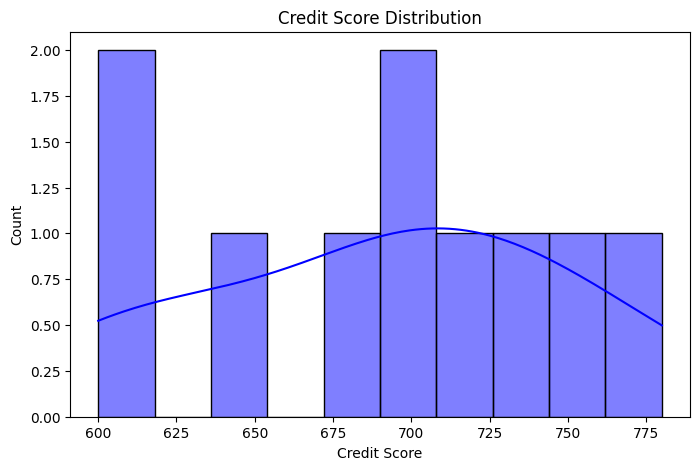

<ipython-input-7-6dca13620b22>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="coolwarm")  # Bar graph


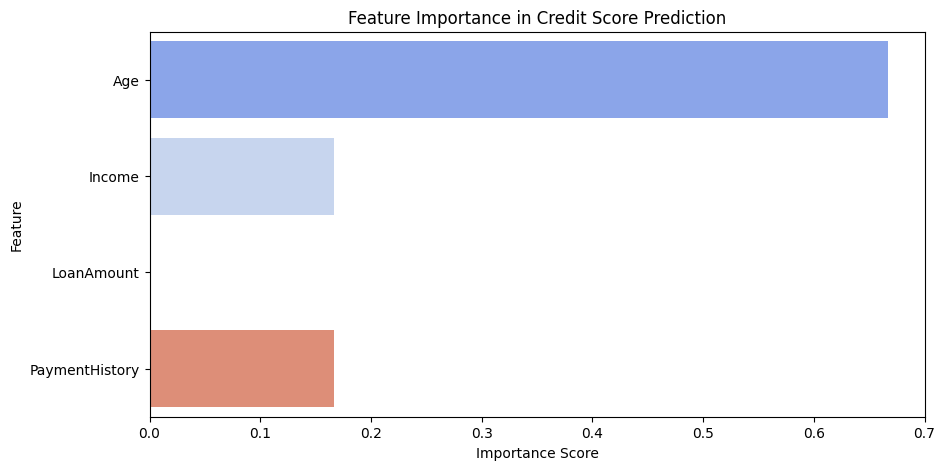

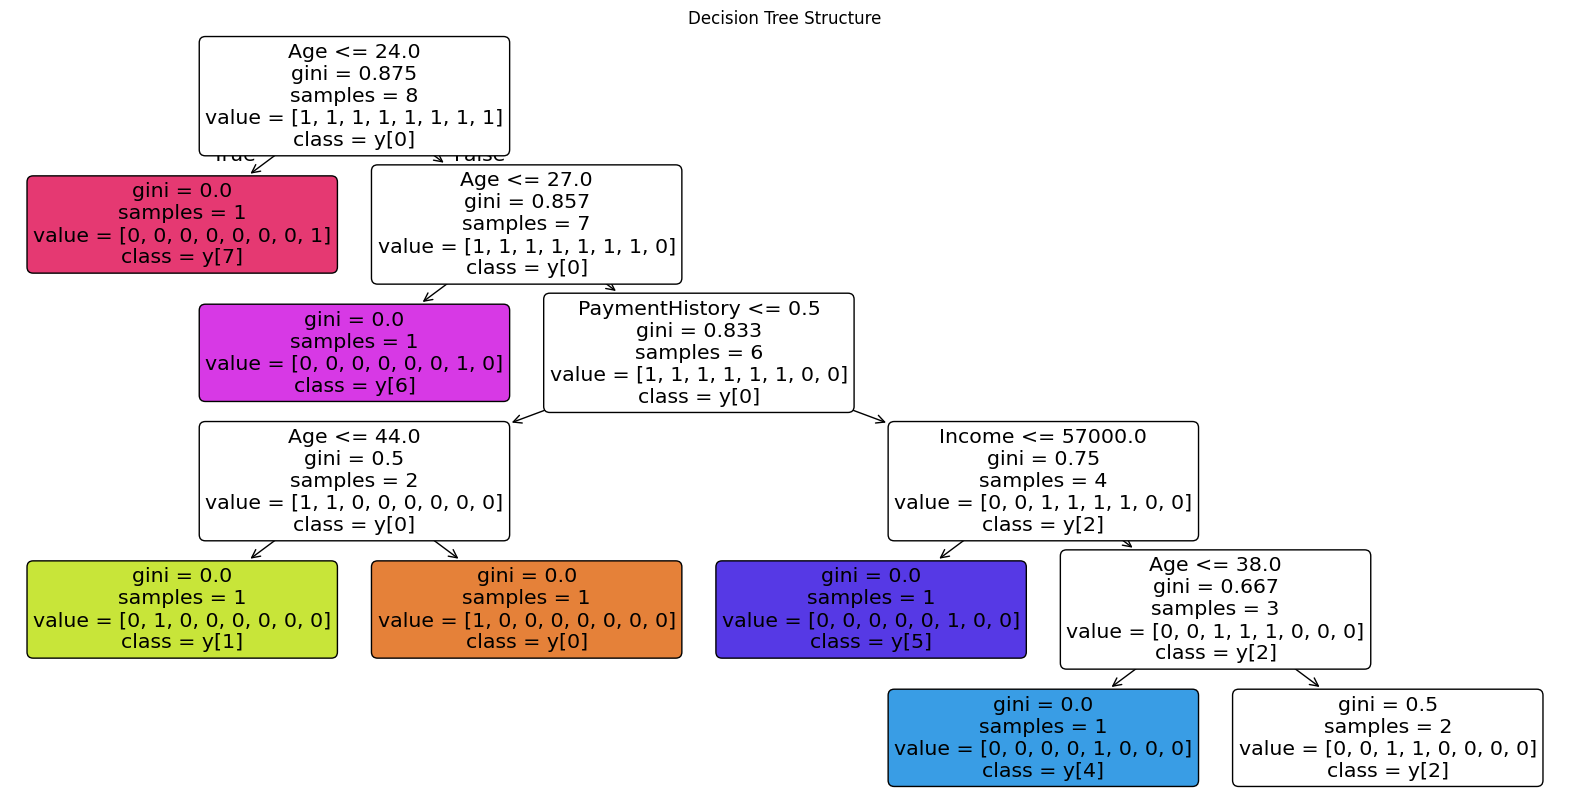

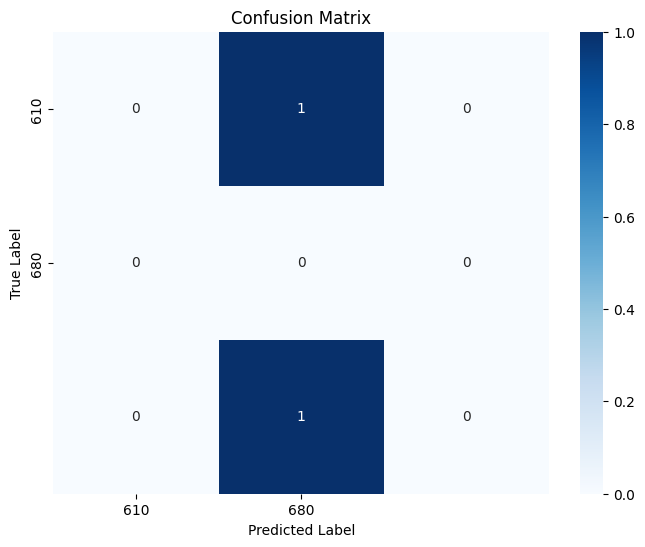

In [7]:
# 📌 Step 1: Import Required Libraries
from google.colab import files  # File upload option ke liye
import pandas as pd  # Data handling ke liye
import numpy as np  # Numerical operations ke liye
import matplotlib.pyplot as plt  # Visualization ke liye
import seaborn as sns  # Beautiful graphs banane ke liye
from sklearn.model_selection import train_test_split  # Training/testing ke liye data split
from sklearn.preprocessing import LabelEncoder  # Categorical data encoding ke liye
from sklearn.impute import SimpleImputer  # Missing values handle karne ke liye
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision tree model & visualization ke liye
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation ke liye

# 📌 Step 2: Upload & Load Dataset
print("📂 Upload your 'credit_data.csv' file:")
uploaded = files.upload()  # Ye user ko file upload karne ka option dega
df = pd.read_csv("/content/credit_data.csv")  # CSV file ko load karna

# 📌 Step 3: Initial Data Exploration
print("\n📊 Initial Data Overview:")
print(df.info())  # Columns, missing values, data types check karne ke liye
print(df.head())  # Pehli 5 rows dikhane ke liye

# 📌 Step 4: Handling Missing Values (Agar kisi column me missing data hai to usko fill karenge)
df.fillna(df.mean(), inplace=True)  # Numerical columns ke missing values ko mean se fill karenge

# 📌 Step 5: Encoding Categorical Variables (Agar koi categorical text data ho to usko numbers me convert karna)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])  # Label Encoding ka use kar rahe hain

# 📌 Step 6: Define Features (X) and Target Variable (y)
X = df.drop(columns=['CreditScore'])  # All columns except target variable
y = df['CreditScore']  # Target variable (Credit Score)

# 📌 Step 7: Split Data into Training & Testing Sets (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 8: Train Decision Tree Model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)  # Decision Tree Classifier
dt_model.fit(X_train, y_train)  # Model ko train karna

# 📌 Step 9: Make Predictions on Test Data
y_pred_dt = dt_model.predict(X_test)  # Trained model se predictions lena

# 📌 Step 10: Model Evaluation
print("\n✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))  # Accuracy score print karna
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_dt))  # Model ki performance check karna

# 📌 Step 11: Data Visualizations

# 🔹 Visualization 1: Credit Score Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["CreditScore"], bins=10, kde=True, color="blue")  # Histogram with KDE
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

# 🔹 Visualization 2: Feature Importance (Jo factors credit score pe effect daal rahe hain)
feature_importances = dt_model.feature_importances_  # Model se feature importance nikalna
features = X.columns  # Feature names

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")  # Bar graph
plt.title("Feature Importance in Credit Score Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# 🔹 Visualization 3: Decision Tree Structure (Model ka tree structure visualize karna)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=True, filled=True, rounded=True)  # Decision tree plot
plt.title("Decision Tree Structure")
plt.show()

# 🔹 Visualization 4: Confusion Matrix (Model ke sahi/galat predictions ko visualize karna)
cm = confusion_matrix(y_test, y_pred_dt)  # Confusion Matrix nikalna
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
